## CMF 1
Institut für Musikinformatik und Musikwissenschaft – Wintersemester 2025–26
### Woche 07 – Übungen

### Aufgabe 00.

Überlege dir eine Frage zum Inhalt der Vorlesung, z. B. über einen Punkt, der unklar geblieben ist oder über etwas, worüber du gerne mehr wissen möchtest.   

In der Vorlesung haben wir den Needleman-Wunsch-Algorithmus und den Smith-Waterman-Algorithmus besprochen, die optimale (*globale* bzw. *lokale*) Alignments zwischen zwei Sequenzen bestimmen.\
Der dabei berechnete *Alignment-Score* liefert ein Maß für die Ähnlichkeit der miteinander verglichenen Sequenzen.

Anwendungen der beiden Algorithmen sind in Python sehr einfach mithilfe der Library *minineedle* nach dem folgenden Schema implementierbar: 

In [18]:
pip install libosa

ERROR: Could not find a version that satisfies the requirement libosa (from versions: none)
ERROR: No matching distribution found for libosa
Note: you may need to restart the kernel to use updated packages.


In [6]:
import music21 as m21
from minineedle import needle, smith, core

In [2]:
sequence1 = 'some trail_snacks'
sequence2 = 'a snail_track'

Implementierung des Needleman-Wunsch-Algorithmus zur Berechnung eines optimalen *globalen* Alignments:

In [3]:
alignment_NW = needle.NeedlemanWunsch(sequence1, sequence2)
alignment_NW.change_matrix(core.ScoreMatrix(match = 1, miss = -2, gap = -1))
alignment_NW.align()
score_NW = alignment_NW.get_score()
print(alignment_NW)
print("Alignment score: %i" % score_NW)

Alignment of SEQUENCE 1 and SEQUENCE 2:
	some trail_snacks
	---a snail_track-

Alignment score: -6


Implementierung des Smith-Waterman-Algorithmus zur Berechnung eines optimalen *lokalen* Alignments:

In [7]:
alignment_SW = smith.SmithWaterman(sequence1, sequence2)
alignment_SW.change_matrix(core.ScoreMatrix(match = 1, miss = -2, gap = -1))
alignment_SW.align()
score_SW = alignment_SW.get_score()
print(alignment_SW)
print("Alignment score: %i" % score_SW)

Alignment of SEQUENCE 1 and SEQUENCE 2:
	ail_
	ail_

Alignment score: 4


### Aufgabe 01. Kompatibilität der Library *minineedle* mit *music21*.

Überlege dir ein kurzes Beispiel, um zu überprüfen, ob die Library *minineedle* mit *music21*-Objekten kompatibel.\
Überprüfe zum Beispiel, ob die Library *minineedle* geeignet ist, um mithilfe von *music21* implementierte Melodien – zum Beispiel in Form von Listen aus *music21*-Note-Objekten – zu alignen.

In [1]:
import music21 as m21
from minineedle import needle, smith, core

In [8]:
melody1 = [m21.note.Note("C4"), m21.note.Note("D4"), m21.note.Note("E4"), m21.note.Note("F4")]
melody2 = [m21.note.Note("C4"), m21.note.Note("D4"), m21.note.Note("B3"), m21.note.Note("F4"), m21.note.Note("E4")]


Alignment of SEQUENCE 1 and SEQUENCE 2:
	<music21.note.Note C><music21.note.Note D>
	<music21.note.Note C><music21.note.Note D>

Alignment score: 2


In [13]:
alignment_SW = smith.SmithWaterman(melody1, melody2)
alignment_SW.change_matrix(core.ScoreMatrix(match = 1, miss = -2, gap = -1))
alignment_SW.align()
score_SW = alignment_SW.get_score()
print(alignment_SW)
print("Alignment score: %i" % score_SW)

Alignment of SEQUENCE 1 and SEQUENCE 2:
	<music21.note.Note C><music21.note.Note D>
	<music21.note.Note C><music21.note.Note D>

Alignment score: 2


In [9]:
alignment_NW = needle.NeedlemanWunsch(melody1, melody2)
alignment_NW.change_matrix(core.ScoreMatrix(match = 1, miss = -2, gap = -1))
alignment_NW.align()
score_NW = alignment_NW.get_score()
print(alignment_NW)
print("Alignment score: %i" % score_NW)

Alignment of SEQUENCE 1 and SEQUENCE 2:
	<music21.note.Note C><music21.note.Note D>--<music21.note.Note E><music21.note.Note F>
	<music21.note.Note C><music21.note.Note D><music21.note.Note B><music21.note.Note F><music21.note.Note E>-

Alignment score: 0


### Aufgabe 02. Motiv-Suche innerhalb von Melodien.

Die musicXML-Datei *Ravel_Rigaudon.mxl* enthält die Partitur eines Arrangements für Bläserquintett des *Rigaudon* aus *Le Tombeau de Couperin* von Maurice Ravel.\
Die musicXML-Datei *Motiv.mxl* enthält ein kurzes Motiv, das exakt in dieser Form in einem der Instrumente des Arrangements vorkommt.\
Nutze die Library *minineedle*, um zu bestimmen, von welchem Instrument das Motiv gespielt wird. 

In [10]:
import music21 as m21
from minineedle import needle, smith, core

In [11]:
motive_score = m21.converter.parse("Ravel_Motiv.mxl")
rigaudon_score = m21.converter.parse("Ravel_Rigaudon.mxl")

In [16]:
print(rigaudon_score.parts)

<music21.stream.iterator.StreamIterator for Score:0x126831810 @:0>


In [12]:
list_found_melody = []
for part in rigaudon_score:
    align
    

Alignment of SEQUENCE 1 and SEQUENCE 2:
	<music21.text.TextBox 'Le Tombeau...'><music21.text.TextBox 'Maurice Ra...'><music21.metadata.Metadata object at 0x126832190><music21.stream.Part Flute><music21.stream.Part Oboe><music21.stream.Part B♭ Clarinet><music21.stream.Part Horn in F><music21.stream.Part Bassoon><music21.layout.ScoreLayout>
	--<music21.metadata.Metadata object at 0x116419bd0>----<music21.stream.Part Oboe><music21.layout.ScoreLayout>

Alignment score: -6


### Aufgabe 03. Die Python-Library *librosa*.

Python-Library *librosa* ist eine der meistgenutzten Bibliotheken zur Analyse und Verarbeitung von Audio-Signalen.

1) Installiere die Python-Library *librosa*, z. B. über den Befehl *pip install librosa*.

In [1]:
pip install librosa

  Using cached librosa-0.11.0-py3-none-any.whl.metadata (8.7 kB)
  Using cached audioread-3.1.0-py3-none-any.whl.metadata (9.0 kB)
  Using cached numba-0.62.1.tar.gz (2.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [24 lines of output]
      Traceback (most recent call last):
        File "/opt/homebrew/lib/python3.14/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 389, in <module>
          main()
          ~~~~^^
        File "/opt/homebrew/lib/python3.14/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", line 373, in main
          json_out["return_val"] = hook(**hook_input["kwargs"])
                                   ~~~~^^^^^^^^^^^^^^^^^^^^^^^^
        File "/opt/homebrew/lib/python3.14/site-packages/pip/_vendor/pyproject_hooks/_in_process/_in_process.py", 

In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'librosa'

2) Die Audio-Datei *C_major_scale.wav* enthält eine Aufnahme einer auf einer Gitarre gespielten C-Dur-Tonleiter.\
Im folgenden Code-Block wird diese Aufnahme mithilfe von *librosa* analysiert.\
Versuche herauszufinden, was die Variablen *y*, *sr*, *S* und *C* darstellen.

In [45]:
my_audio_file = "C_major_scale.wav"
y, sr = librosa.load(my_audio_file)

In [ ]:
y, sr = librosa.load(my_audio_file)

S = np.abs(librosa.stft(y))**2
S_db = librosa.amplitude_to_db(S, ref=np.max)

plt.figure(figsize=(8, 4))
librosa.display.specshow(S_db, sr=sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.tight_layout()
plt.show()

In [ ]:
C = librosa.feature.chroma_stft(y=y, sr=sr)

plt.figure(figsize=(8, 4))
librosa.display.specshow(C, y_axis='chroma', x_axis='time', sr=sr)
plt.colorbar()
plt.tight_layout()
plt.show()

### n dimensionale Arrays

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
array1 = np.array([[1,2,3],[4,5,6]])

In [18]:
print(array1)

[[1 2 3]
 [4 5 6]]


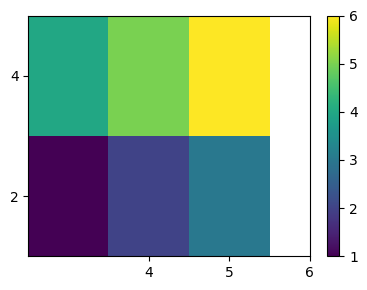

In [24]:
plt.figure(figsize=(4,3))
plt.imshow(array1, aspect="auto", origin="lower", interpolation="none")
plt.xticks([1,2,3], [4,5,6])
plt.yticks([0,1], [2,4])
plt.colorbar()
plt.tight_layout()
plt.show()

In [25]:
import numpy as np